<a href="https://colab.research.google.com/github/caniban/MEU_Makine_Ogrenmesi/blob/main/TEC_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving tec_test.xlsx to tec_test (1).xlsx


In [3]:
veri = pd.read_excel('tec_test.xlsx')
veri

,date,doy,hod,tec,"BZ, nT (GSM)","SW Plasma Speed, km/s","Dst-index, nT","ap_index, nT",f10.7_index
0,2015-01-01,1,0,8.96,1.1,568,-14,9,132.9
1,2015-01-01,1,1,9.36,0.3,585,-13,9,132.9
2,2015-01-01,1,2,9.88,-0.7,579,-15,9,132.9
3,2015-01-01,1,3,11.35,0.5,560,-13,4,132.9
4,2015-01-01,1,4,9.53,-0.1,554,-12,4,132.9
...,...,...,...,...,...,...,...,...,...
1771,2015-03-15,74,19,24.52,8.4,314,13,7,113.1
1772,2015-03-15,74,20,17.82,0.1,312,9,7,113.1
1773,2015-03-15,74,21,15.47,4.2,298,4,4,113.1
1774,2015-03-15,74,22,15.46,3.9,305,5,4,113.1


In [4]:
start_time = pd.to_datetime('2015-01-01 00:00:00',infer_datetime_format=True)
end_time = pd.to_datetime('2015-03-15 23:00:00', infer_datetime_format=True)

timestamp = pd.date_range(start_time, end_time, freq='h')
veri['timestamp'] = timestamp 
cols = veri.columns.tolist()
cols = cols[-1:] + cols[:-1]
veri = veri[cols]
veri.head()

,timestamp,date,doy,hod,tec,"BZ, nT (GSM)","SW Plasma Speed, km/s","Dst-index, nT","ap_index, nT",f10.7_index
0,2015-01-01 00:00:00,2015-01-01,1,0,8.96,1.1,568,-14,9,132.9
1,2015-01-01 01:00:00,2015-01-01,1,1,9.36,0.3,585,-13,9,132.9
2,2015-01-01 02:00:00,2015-01-01,1,2,9.88,-0.7,579,-15,9,132.9
3,2015-01-01 03:00:00,2015-01-01,1,3,11.35,0.5,560,-13,4,132.9
4,2015-01-01 04:00:00,2015-01-01,1,4,9.53,-0.1,554,-12,4,132.9


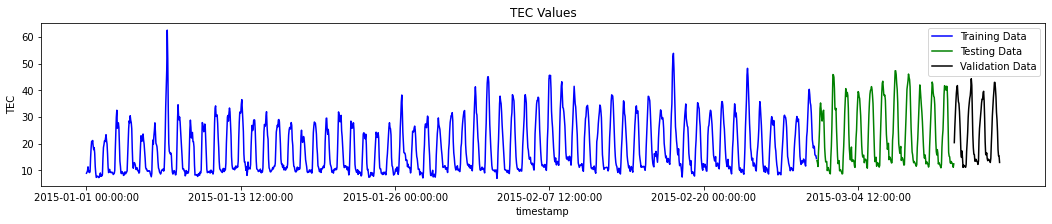

In [5]:
# Ocak Şubat train (takribi %80), Mart ilk on gün test (takribi %15), Mart 10-15 validation (takribi %5)
train_data, test_data, validation_data = veri[0:int(len(veri)*0.8)], veri[int(len(veri)*0.8):int(len(veri)*0.95)], veri[int(len(veri)*0.95):int(len(veri))]
plt.figure(figsize=(18,3))
plt.title('TEC Values')
plt.xlabel('timestamp')
plt.ylabel('TEC')
plt.plot(train_data['tec'], 'blue', label='Training Data')
plt.plot(test_data['tec'], 'green', label='Testing Data')
plt.plot(validation_data['tec'], 'black', label='Validation Data')
plt.xticks(np.arange(0,1775, 300), veri['timestamp'][0:1775:300])
plt.legend()

In [6]:
dayofyear = [datetime.dayofyear for datetime in timestamp ]
hourofday = [datetime.hour for datetime in timestamp]
time = np.vstack((dayofyear, hourofday)).T
measurement = veri['tec'] 
measurement = measurement.to_numpy()


In [7]:
time_train=time[0:int(len(veri)*0.8)]
time_test = time[int(len(veri)*0.8):int(len(veri)*0.95)]
time_convalidation = time[int(len(veri)*0.95):int(len(veri))]
measurement_train = measurement[0:int(len(veri)*0.8)]
measurement_test = measurement[int(len(veri)*0.8):int(len(veri)*0.95)]
measurement_convalidation = measurement[int(len(veri)*0.95):int(len(veri))]

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(time_train)

time_train = scaler.transform(time_train)
time_test = scaler.transform(time_test)
time_convalidation = scaler.transform(time_convalidation)

In [9]:
from sklearn.ensemble import RandomForestRegressor

regrRF = RandomForestRegressor(n_estimators=1000)

regrRF.fit(time_train, measurement_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [10]:
regrRF.score(time_test, measurement_test)


In [ ]:
tested = regrRF.predict(time_test)

In [11]:
predictions = regrRF.predict(time_convalidation)

In [12]:
print(measurement_convalidation.shape)
print(predictions.shape)

(89,)
(89,)


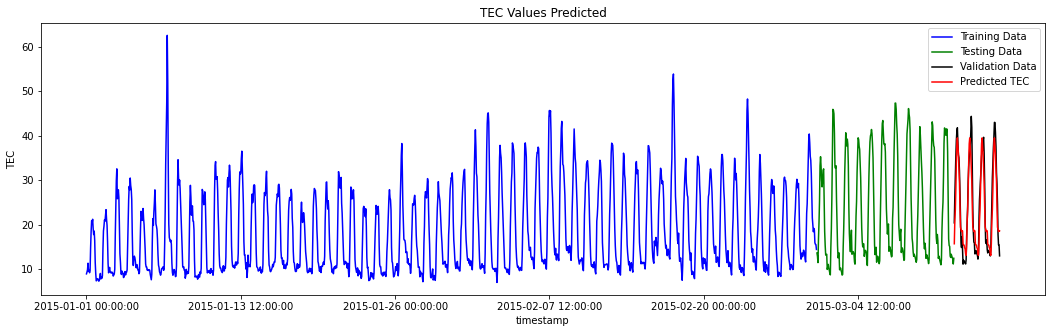

In [13]:
plt.figure(figsize=(18,5))
plt.plot(train_data['tec'], 'blue', label='Training Data')
plt.plot(test_data['tec'], 'green', label='Testing Data')
plt.plot(validation_data['tec'], 'black', label='Validation Data')
plt.plot(validation_data.index, predictions, 'red', 
         label='Predicted TEC')
plt.title('TEC Values Predicted - Random Forest Algorithm')
plt.xlabel('timestamp')
plt.ylabel('TEC')
plt.xticks(np.arange(0,1775, 300), veri['timestamp'][0:1775:300])
plt.legend(loc='upper right')

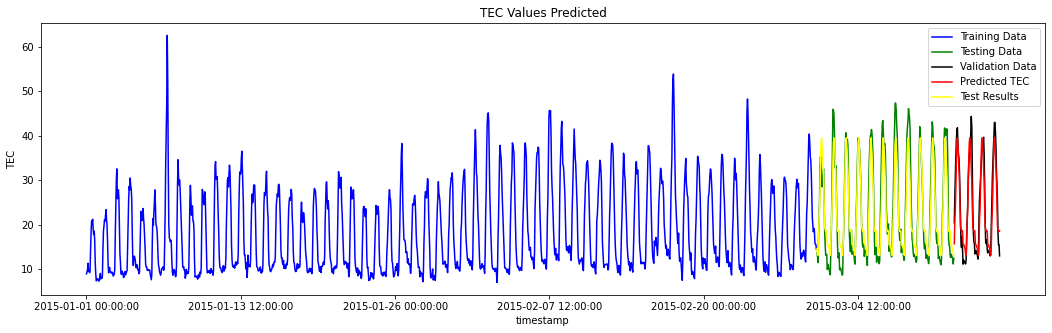

In [14]:
plt.figure(figsize=(18,5))
plt.plot(train_data['tec'], 'blue', label='Training Data')
plt.plot(test_data['tec'], 'green', label='Testing Data')
plt.plot(validation_data['tec'], 'black', label='Validation Data')
plt.plot(validation_data.index, predictions, 'red', 
         label='Predicted TEC')
plt.plot(test_data.index, tested, 'yellow', 
         label='Test Results')
plt.title('TEC Values Predicted')
plt.xlabel('timestamp')
plt.ylabel('TEC')
plt.xticks(np.arange(0,1775, 300), veri['timestamp'][0:1775:300])
plt.legend(loc='upper right')